**Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

import conv_deconv_blocks as cdb
import data_processing as dp
import gan_cvae_model as md
import cris_utils as cu

**Tensorflow GPU Verification**

In [2]:
print("\n","Versión de tensorflow: " + str(tf.__version__),"\n")
print("Comprobación de la GPU:",tf.config.experimental.list_physical_devices('GPU'),"\n")


 Versión de tensorflow: 2.1.0 

Comprobación de la GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] 



# GAN CVAE

**Model Arquitecture**

In [3]:
N_H = 64
N_W = 64
N_C = 1

cvae_enc_convs = [(16,False,cdb.lr_act,3,2),
              (32,False,cdb.lr_act,3,2),
              (64,False,cdb.lr_act,3,2),
             (128,False,cdb.lr_act,3,2),
             (256,False,cdb.lr_act,3,2)]

cvae_dec_deconvs = [(256,False,cdb.r_act,3,2),
               (128,False,cdb.r_act,3,2),
               (64,False,cdb.r_act,3,2),
               (32,False,cdb.r_act,3,2),
               (N_C,False,cdb.th_act,3,2)]

gan_disc_convs = [(16,False,cdb.lr_act,3,2),
              (32,False,cdb.lr_act,3,2),
              (64,False,cdb.lr_act,3,2),
             (128,False,cdb.lr_act,3,2),
             (256,False,cdb.lr_act,3,2)]

n_cvae_conv_ls = len(cvae_enc_convs)
n_cvae_deconv_ls = len(cvae_dec_deconvs)

max_layers = cu.max_conv_deconv_layers(N_H)
assert (n_cvae_conv_ls<=max_layers and n_cvae_deconv_ls<=max_layers), "Incorrect number of layers for cvae model"

config = {
    md.batch_size_k: 16,
    md.latent_dim_k: 32,
    md.data_dir_patt_k: ["data_FVC2006","png"],
    md.fps_shape_k: (N_H,N_W,N_C),
    md.cvae_checkpoints_folder_k: "./tf_Checkpoints/CVAE",
    md.gan_checkpoints_folder_k: "./tf_Checkpoints/GAN",
    md.max_checkpoints_k: 2
}

cvae_enc_config = {
    cdb.fps_shape_k: config[md.fps_shape_k],
    cdb.enc_dec_lys_info_k: cvae_enc_convs,
    cdb.enc_fin_den_len_k: 2*config[md.latent_dim_k]
}

hw_f_v = N_H/np.power(2,n_cvae_deconv_ls)

cvae_dec_config = {
    cdb.dec_den_info_k: ([hw_f_v,hw_f_v,256],False,cdb.r_act,(config[md.latent_dim_k],)),
    cdb.enc_dec_lys_info_k: cvae_dec_deconvs,
}

gan_disc_config = {
    cdb.fps_shape_k: config[md.fps_shape_k],
    cdb.enc_dec_lys_info_k: gan_disc_convs,
    cdb.enc_fin_den_len_k: 1
}

for H,W = 64, # deconv layers and # conv layers <= 6
(# conv layers, heigh,width of last enc volume)
(# deconv layers, heigh,width of first dec volume)
[(1, 32), (2, 16), (3, 8), (4, 4), (5, 2), (6, 1)] 



**Data Preparation**

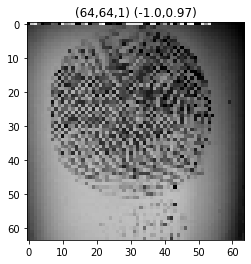

In [4]:
ds_data_dirs = dp.load_process_fp_dataset(config[md.data_dir_patt_k],config[md.fps_shape_k],config[md.batch_size_k])
l = list(ds_data_dirs.as_numpy_iterator())
cu.imshow(l[0][0,:])

**Creation of Model**

In [5]:
gan_cvae = md.GAN_CVAE(cvae_enc_config,cvae_dec_config,gan_disc_config,config)

**Training Configuration**

In [6]:
cvae_train_conf = {
    md.num_epochs_k: 5,
    md.types_losses_k: [md.square_loss,md.kl_loss,md.ssim_loss],
    md.alphas_losses_k: [1.0,0.01,0.5],
    md.dataset_k: ds_data_dirs,
    md.use_latest_checkpoint_k: False,
    md.tensorboard_folder_k: "./tf_Tensorboard_logs",
    md.out_images_folder_k: "./img_Performance_Images",
    md.checkpoints_frecuency_k: 2,
    md.num_images_k: 2
}

**Training**

In [7]:
gan_cvae.cvae_train(cvae_train_conf)

CVAE training started
Training finished
Training total time: 32.47277522087097
Average time per epoch: 6.494555044174194


**Remove Files**

In [9]:
import cris_utils as cu
cu.delete_All("C:/Users/Y50/Documents/Universidad/Tesis/Codigo/tf_Tensorboard_logs/*")
cu.delete_All("C:/Users/Y50/Documents/Universidad/Tesis/Codigo/tf_Checkpoints/CVAE/*")
cu.delete_All("C:/Users/Y50/Documents/Universidad/Tesis/Codigo/tf_Checkpoints/GAN/*")
cu.delete_All("C:/Users/Y50/Documents/Universidad/Tesis/Codigo/img_Performance_Images/*")

Are you sure you want to delete this? 

C:/Users/Y50/Documents/Universidad/Tesis/Codigo/tf_Tensorboard_logs\27-02-2020_02-59-59-PM
Type y or n: y

 Deleted Files
Are you sure you want to delete this? 

C:/Users/Y50/Documents/Universidad/Tesis/Codigo/tf_Checkpoints/CVAE\checkpoint
C:/Users/Y50/Documents/Universidad/Tesis/Codigo/tf_Checkpoints/CVAE\ckpt-1.data-00000-of-00002
C:/Users/Y50/Documents/Universidad/Tesis/Codigo/tf_Checkpoints/CVAE\ckpt-1.data-00001-of-00002
C:/Users/Y50/Documents/Universidad/Tesis/Codigo/tf_Checkpoints/CVAE\ckpt-1.index
C:/Users/Y50/Documents/Universidad/Tesis/Codigo/tf_Checkpoints/CVAE\ckpt-2.data-00000-of-00002
C:/Users/Y50/Documents/Universidad/Tesis/Codigo/tf_Checkpoints/CVAE\ckpt-2.data-00001-of-00002
C:/Users/Y50/Documents/Universidad/Tesis/Codigo/tf_Checkpoints/CVAE\ckpt-2.index
Type y or n: y

 Deleted Files
Are you sure you want to delete this? 

Type y or n: n
Are you sure you want to delete this? 

C:/Users/Y50/Documents/Universidad/Tesis/Codigo/img

**Test Code**